# *22년 01월 18일 프로그래밍 세미나
# ** 발표자: 황우영

# 순환신경망 (Recurrent Neural Network, RNN)
###What is RNN?


*   입력과 출력을 시퀀스 단위로 처리하는 시퀀스(Sequence) 모델
*   RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖음



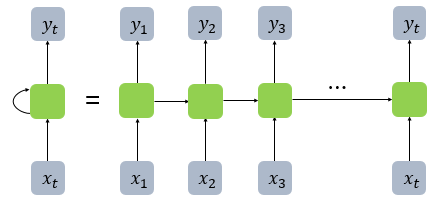


*   은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀(cell)이라 함
*   셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 메모리 셀 또는 RNN 셀이라고 표현





### RNN은 입력과 출력의 길이를 다르게 설계 할 수 있으므로 다양한 용도로 사용할 수 있음
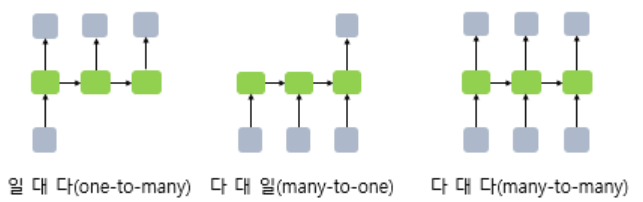




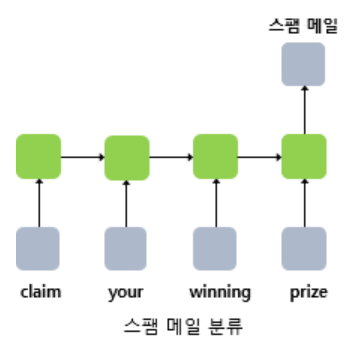


*   시퀀스에 대해서 하나의 출력을 하는 다 대 일(many-to-one) 구조의 모델은 입력 문서가 긍정적인지 부정적인지를 판별하는 감성 분류(sentiment classification), 또는 메일이 정상 메일인지 스팸 메일인지 판별하는 스팸 메일 분류(spam detection) 등에 사용할 수 있음

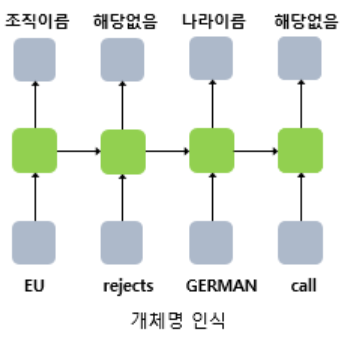

*   다 대 다(many-to-many) 구조의 모델의 경우에는 사용자가 문장을 입력하면 대답 문장을 출력하는 챗봇과 입력 문장으로부터 번역된 문장을 출력하는 번역기, 또는 '태깅 작업' 챕터에서 배우는 개체명 인식이나 품사 태깅과 같은 작업


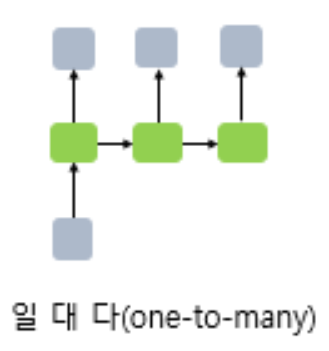



*   하나의 입력에 대해서 여러개의 출력을 의미하는 일 대 다(one-to-many) 구조의 모델은 하나의 이미지 입력에 대해서 사진의 제목을 출력하는 이미지 캡셔닝(Image Captioning) 같은 작업에 활용 가능함









###  RNN의 알고리즘

*   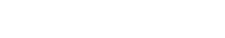
*   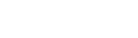

       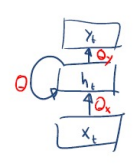


1.   h(t): 시간 t에서의 hidden state
2.   y(t) : 시간 t에서의 observation( or output) state
3.   x(t): 시간 t에서의 input state
4.   theta(x): 시간 t에서의 input state에 대한 weight parameter
5.   theta(y): 시간 t에서의 overvations state에 대한 weight parameter
6.   theta: recurrent state에 대한 weight parameter
7.   sigmoid: sigmoid function









###  One to Many 구조의 RNN full gradient 계산 방식을 코딩

In [1]:
''' 기본 모듈 및 시각화 모듈 '''
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''데이터 생성'''
H=[1,0,0,0] 
E=[0,1,0,0] 
L=[0,0,1,0] 
O=[0,0,0,1]






*   단어 H를 바탕으로 순차적으로 다음에 올 단어를 예측하는 RNN으로
H가 들어가게 된다면 학습에 따라 뒤에 ELLO가 출력되는 one-to-many 형식






In [3]:
'''입력값과 출력값'''
output = [E, L, L, O]
input = [H]



*   출력값인 [E, L, L, L, O]를 설정
*   입력값인 [H]를 설정




In [4]:
'''초기 가중치 활성화'''
dimension = np.size(input,1)                                # dimension of the samples of input
hidden_unit = 100                                           # number of hidden units
output_dimension = 4                                        # dimension of the sample of output

W = 2/np.sqrt(dimension)*(np.random.rand(hidden_unit,dimension) - 0.5)                       #dimension: (100, 4)
V = 2/np.sqrt(hidden_unit)*(np.random.rand(hidden_unit,hidden_unit) - 0.5)                   #dimension: (100, 100)
output_weight = 2/np.sqrt(hidden_unit)*(np.random.rand(output_dimension,hidden_unit) - 0.5)  #dimensionL (4, 100)

'''Learning rate'''
lr = 0.01 



*   dimension: 입력값의 차원
*   hidden_unit: hidden unit의 개수
*   output_dimension: 출력값의 차원






In [5]:
'''history를 다을 list 생성'''
t_ = []
loss_history = []



*   t_: time step
*   loss_history: loss 기록



In [6]:
'''sigmoid 활성화 함수 생성'''
def sigmoid(x):
    sigmoid = 1/(1+np.exp(-x))
    return sigmoid




* 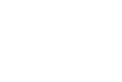


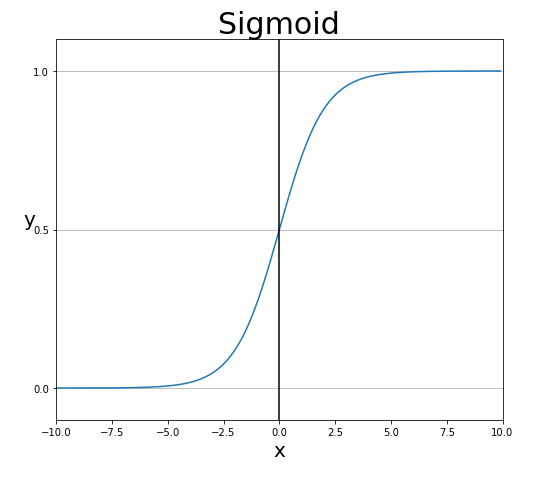



*   시그모이드 함수는 S자형 곡선 또는 시그모이드 곡선을 갖는 수학 함수




In [7]:
'''initial hidden state'''
h0 = np.zeros(hidden_unit)



*   초기 hidden value를 생성 --> 0으로 채워준다




0 -th epoch trained


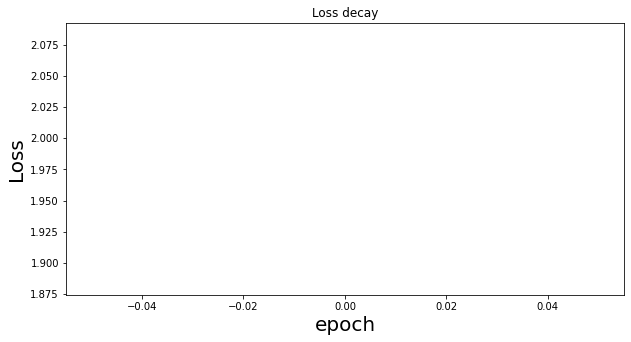

100 -th epoch trained


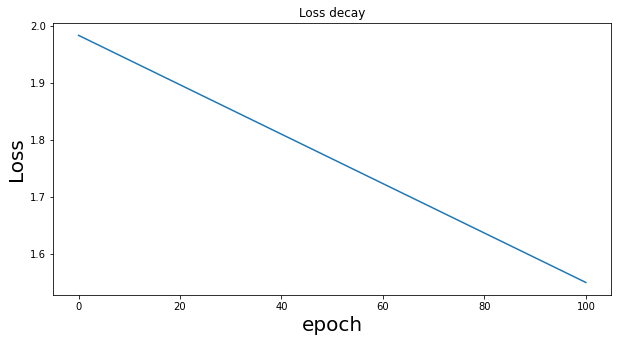

200 -th epoch trained


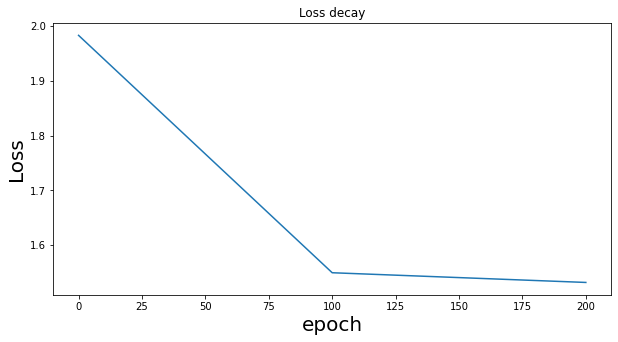

300 -th epoch trained


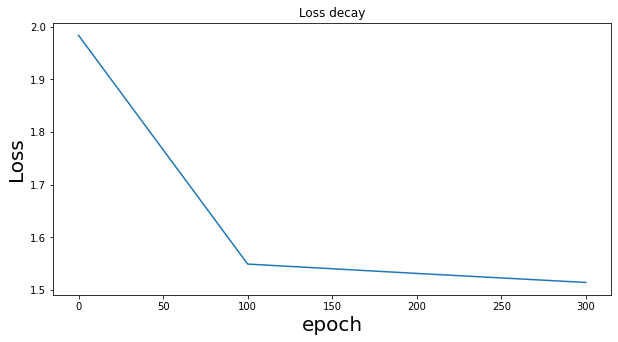

400 -th epoch trained


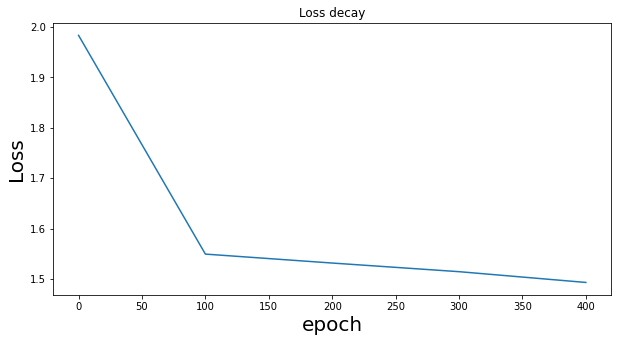

500 -th epoch trained


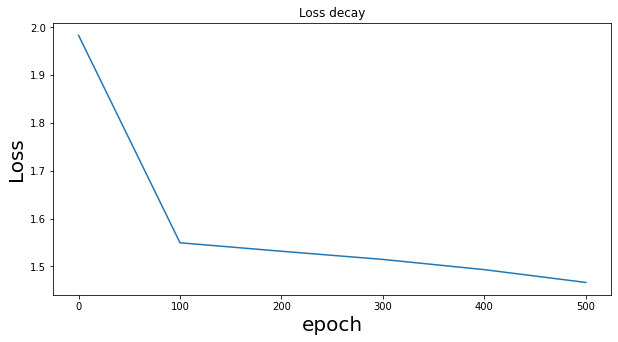

600 -th epoch trained


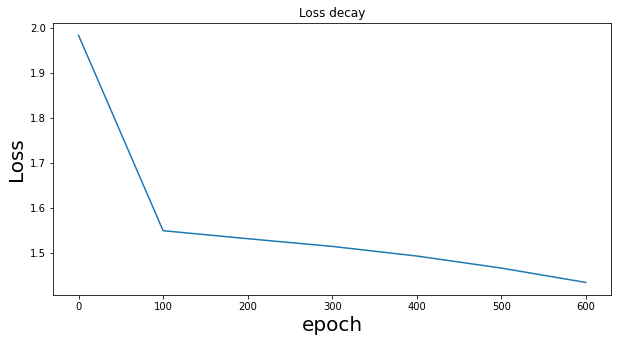

700 -th epoch trained


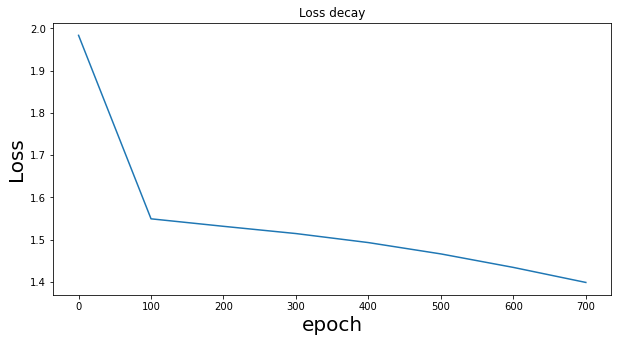

800 -th epoch trained


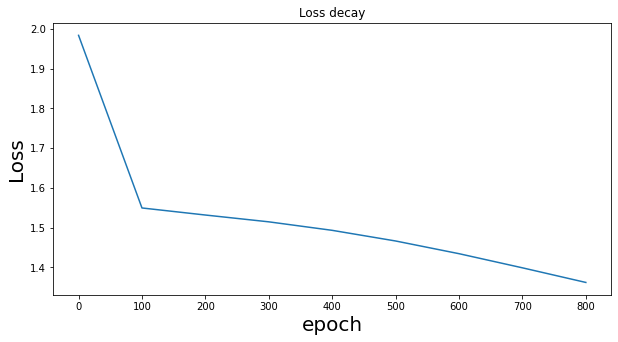

900 -th epoch trained


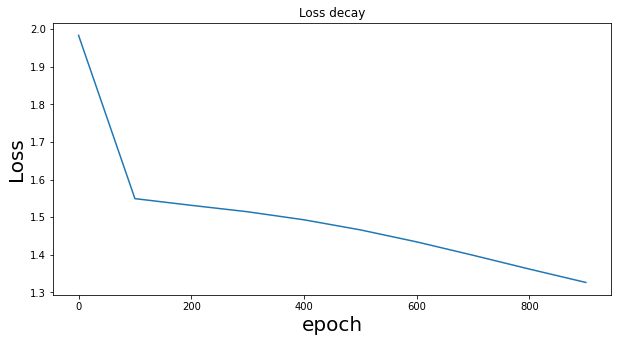

In [8]:
for epoch in range(0,1000):
    loss = 0
    hidden_history = []                             #hidden value의 기록을 위한 empty list
    #forward compute pass(순전파)
    for i in range(0,output_dimension):                                  
        x = input[0]                                #H=[1,0,0,0] --> dimension: (4,)
        v1 = np.dot(W,x) + np.dot(V,h0)             #v1 dimension (100,)
        y1 = sigmoid(v1)                            #y1 dimension (100,)

        if i != output_dimension-1:                 #마지막 output_dimension이 아닐시 hidden value를 기록
            h0 = y1
        else:
            h0 = 0*y1
        hidden_history.append(y1)
       
        if i == output_dimension-1:                 #마지막 계산
            third_v = np.dot(output_weight,y1)
            third_y = sigmoid(third_v)
            d3 = output[i]
        elif i == output_dimension-2:               #세번째 계산
            seoncd_v = np.dot(output_weight,y1)
            second_y = sigmoid(seoncd_v)
            d2 = output[i]
        elif i == output_dimension-3:               #두번째 계산
            first_v = np.dot(output_weight,y1)
            first_y = sigmoid(first_v)
            d1 = output[i]
        else:
            zero_v = np.dot(output_weight,y1)       #첫 계산, 각 계산 값들을 변수에 저장
            zero_y = sigmoid(zero_v)                #zero_v dimension (4,), zero_y: output
            d0 = output[i]

    #backpropagation(역전파)
    for i_ in range(0,output_dimension):                                  
        i = output_dimension-1 - i_                                                 #i: 3, 2, 1, 0
        ############################
        # delta rule
        ############################
        if i == output_dimension-1:                                                 #첫 역전파 계산
            e = third_y - d3                                                        #순전파 마지막 계산 출력값과 정답의 차이
            delta = third_y*(1-third_y)*e                                           #delta를 구함
            
            e33 = np.dot(np.transpose(output_weight),delta)                         #새로구한 delta를 기존 가중치에 반영
            y1 = hidden_history[i]                                                  #처음 출력값(y1)을 마지막 hidden value로 대체
            third_delta = y1*(1-y1)*e33                                             #새로구한 마지막 hidden value(y1)의 delta구함
            
            x = input[0]        
            output_weight = output_weight - lr*np.dot(np.transpose([delta]),[y1])   #output weight을 새로운 weight과 learning rate로 조정
            W = W - lr*np.dot(np.transpose([third_delta]),[x])                      #마지막 출력값에 대한 수정된 가중치를 반영
            V = V - lr*np.dot(np.transpose([third_delta]),[hidden_history[i-1]])    #전 시점의 hidden value에 대한 가중치 반영
                
            loss = loss + 1/2*np.linalg.norm(e)                                     #np.linalg.norm: vector에서의 L2 norm을 행렬로 확장하는 funciton
            
        elif i == output_dimension-2:
            e = second_y - d2
            delta = second_y*(1-second_y)*e
            
            e22 = np.dot(np.transpose(V),third_delta)
            y1 = hidden_history[i]
            second_delta = y1*(1-y1)*e22
            
            x = input[0]
            output_weight = output_weight - lr*np.dot(np.transpose([delta]),[y1])
            W = W - lr*np.dot(np.transpose([second_delta]),[x])
            V = V - lr*np.dot(np.transpose([second_delta]),[hidden_history[i-1]])
            
            loss = loss + 1/2*np.linalg.norm(e)
            
        elif i == output_dimension-3:
            e = first_y - d1
            delta = first_y*(1-first_y)*e
            
            e11 = np.dot(np.transpose(V),second_delta)
            y1 = hidden_history[i]
            first_delta = y1*(1-y1)*e11
            
            x = input[0]
            output_weight = output_weight - lr*np.dot(np.transpose([delta]),[y1])
            W = W - lr*np.dot(np.transpose([first_delta]),[x])
            V = V - lr*np.dot(np.transpose([first_delta]),[hidden_history[i-1]])
            
            loss = loss + 1/2*np.linalg.norm(e)
            
        else:                                                                      
            e = zero_y - d0                                                         
            delta = zero_y*(1-zero_y)*e
            
            e00 = np.dot(np.transpose(V),first_delta)
            y1 = hidden_history[i]
            initial_delta = y1*(1-y1)*e00
            
            x = input[0]
            output_weight = output_weight - lr*np.dot(np.transpose([delta]),[y1])
            W = W - lr*np.dot(np.transpose([initial_delta]),[x])
            
            loss = loss + 1/2*np.linalg.norm(e)
        
    if np.mod(epoch,100) == 0:
        print(epoch,"-th epoch trained")
            
        t_ = np.append(t_,epoch)
        loss_history = np.append(loss_history,loss)
            
        plt.figure(num=0,figsize=[10,5])
        plt.plot(t_,loss_history,marker="")
        plt.title('Loss decay')
        plt.xlabel('epoch',FontSize=20)
        plt.ylabel('Loss',FontSize=20)
        plt.show()

In [9]:
## test trained model 
for i in range(0,output_dimension):
    x = input[0]
    v1 = np.dot(W,x) + np.dot(V,h0)
    y1 = sigmoid(v1)
    h0 = y1
    v2 = np.dot(output_weight,y1)
    y2 = sigmoid(v2)
    print(y2)

[0.02204491 0.60903754 0.34192747 0.14099477]
[0.02791583 0.1929035  0.56945152 0.30885776]
[0.02770707 0.19829461 0.55698435 0.30959809]
[0.0277583  0.20013197 0.55537265 0.308979  ]


결과= [0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 1, 0]
[0, 0, 1, 0]

--> [E], [L], [L], [L]

마지막 [O]를 번역하지 못했다.



###이유

1.   하드 코딩시 최적화 수준이 낮음
2.   하드 코딩에서 오는 기울기 소실/폭발?

